In [1]:
from base_functions import *

start, end =  "2020-01-10", "2022-10-10"
tickers = {
    "snp":"^GSPC", #미국 대형주
    "iwd":"IWD", #미국 대형가치주 
    "iwm":"IWM", #미국 소형주
    "iwn":"IWN", #미국 소형가치주 
    "mtum":"MTUM", #미국 모멘텀주
    "efa":"EFA", #국제 주식 
    "tlt":"TLT", #미국 장기체 
    "ief":"IEF", #미국 중기채 
    "lqd":"LQD", #미국 회사채 
    "dbc":"DBC", #원자재 
    "vnq":"VNQ", #부동산 
    "bwx":"BWX", #국제 국체 
    "GLD":"GLD" #금 
}

closeData = pd.DataFrame()
for name, ticker in tickers.items():
    closeData[name] = getCloseDataPandas(ticker, start, end)
closeData.dropna(inplace=True)    
closeData   

,snp,iwd,iwm,iwn,mtum,efa,tlt,ief,lqd,dbc,vnq,bwx,GLD
Date,,,,,,,,,,,,,
2020-01-09,3274.699951,136.710007,165.509995,127.220001,127.559998,69.709999,137.220001,111.010002,128.339996,15.870000,91.580002,28.570000,146.029999
2020-01-10,3265.350098,136.190002,164.889999,126.529999,127.559998,69.449997,138.440002,111.250000,128.699997,15.870000,92.279999,28.650000,146.910004
2020-01-13,3288.129883,136.960007,165.960007,127.470001,128.750000,69.809998,138.020004,111.120003,128.389999,15.750000,93.389999,28.610001,145.820007
2020-01-14,3283.149902,137.179993,166.570007,127.669998,128.500000,69.879997,138.729996,111.339996,128.550003,15.820000,93.040001,28.559999,145.690002
2020-01-15,3289.290039,137.210007,167.369995,127.910004,129.589996,69.879997,139.649994,111.620003,128.830002,15.740000,93.879997,28.660000,146.539993
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-04,3790.929932,144.149994,176.000000,137.350006,138.100006,59.410000,103.540001,97.139999,104.480003,25.110001,83.250000,21.430000,160.699997
2022-10-05,3783.280029,143.639999,174.699997,136.050003,138.279999,58.779999,102.550003,96.220001,103.690002,25.559999,81.620003,21.160000,159.809998
2022-10-06,3744.520020,142.020004,173.720001,135.110001,137.360001,57.750000,101.980003,95.690002,103.449997,25.719999,79.349998,21.000000,159.630005


In [2]:
pd.set_option("display.max_rows", None)
def getWeightByAvg(closeDataSet, n=10):
    priceOnRebalDate = closeDataSet.loc[getRebalancingDate(closeDataSet)] # 리밸런싱 일자의 가격 데이터
    avgReturnRate = 0
    for i in [1, 3, 6, 12]:
        avgReturnRate += priceOnRebalDate / priceOnRebalDate.shift(i).fillna(method="bfill") -1
    avgReturnRate = avgReturnRate / 4

    avgCost = priceOnRebalDate
    for i in range(1, n+1):
        avgCost = avgCost + priceOnRebalDate.shift(i).fillna(method="bfill")
    avgCost = avgCost / n
    avgCost = priceOnRebalDate - avgCost
            
    weight = pd.DataFrame(0, index=avgReturnRate.index, columns=avgReturnRate.columns)
    for row in avgReturnRate.iloc:
        target = row.sort_values(ascending=False)[0:3]
        for name, item in target.iteritems():
            if(avgCost.loc[row.name][name] > 0):
                weight.loc[row.name][name] = 1

            else:
                weight.loc[row.name][name] = 0

    weight["cash"] = 3 - weight.apply(sum, axis=1)
    weight = weight.divide(weight.sum(axis=1), axis=0).fillna(0)
                
    return weight
    
weight = getWeightByAvg(closeData)
print(weight)

                 snp       iwd       iwm       iwn      mtum  efa       tlt  \
Date                                                                          
2020-01-31  0.000000  0.000000  0.000000  0.000000  0.000000  0.0  0.000000   
2020-02-28  0.000000  0.000000  0.000000  0.000000  0.000000  0.0  0.000000   
2020-03-31  0.000000  0.000000  0.000000  0.000000  0.000000  0.0  0.333333   
2020-04-30  0.000000  0.000000  0.000000  0.000000  0.000000  0.0  0.333333   
2020-05-29  0.000000  0.000000  0.000000  0.000000  0.000000  0.0  0.000000   
2020-06-30  0.000000  0.000000  0.000000  0.000000  0.000000  0.0  0.000000   
2020-07-31  0.000000  0.000000  0.000000  0.000000  0.333333  0.0  0.000000   
2020-08-31  0.333333  0.000000  0.000000  0.000000  0.333333  0.0  0.000000   
2020-09-30  0.000000  0.000000  0.000000  0.000000  0.333333  0.0  0.000000   
2020-10-30  0.000000  0.000000  0.000000  0.000000  0.000000  0.0  0.000000   
2020-11-30  0.000000  0.000000  0.333333  0.333333  

In [3]:
closeData["cash"] = 1
dayRet, cumRet = getRebalancingPortfolio(closeData, weightDf=weight)
cagr, dd, mdd = getEval(cumRet)

return: 1.1382998533845652 
 cagr: 1.0492494924468265 
 mdd: 16.111290960711404


<Figure size 640x480 with 0 Axes>

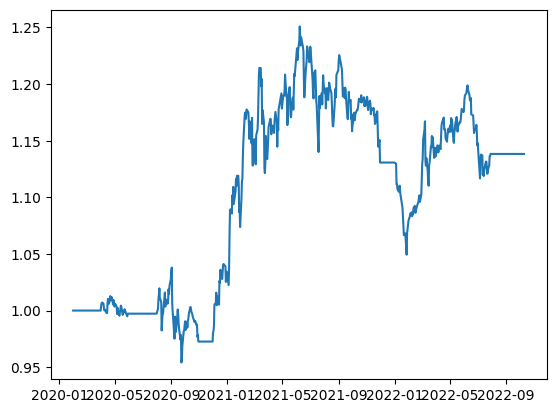

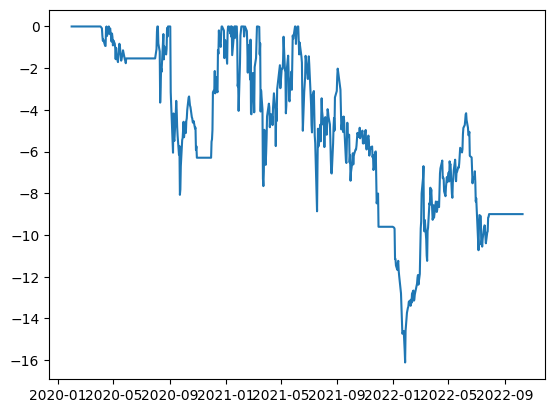

In [4]:
plt.figure()
plt.subplots()
plt.plot(cumRet)
plt.subplots()
plt.plot(-dd)